# MNIST Convolutional Neural Network

Adapted from https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

## Load MNIST dataset

In [53]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# split off some validation data from test set 
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5, random_state=42)

## Exploratory Data Analysis

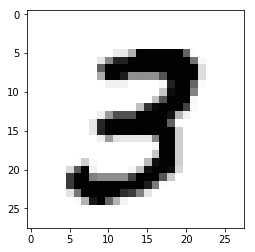

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253 253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252 252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252 252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 132 132 189 252 25

In [78]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.set_printoptions(edgeitems=30, linewidth=100000, )
%matplotlib inline

# look at an image
sample = 7 # 2nd element in our training dataset

plt.imshow(X_train[sample], cmap=cm.Greys)
plt.show()
print(X_train[sample])

In [28]:
# check image shape
X_train[sample].shape

(28, 28)

## Data pre-processing

In [29]:
# Reshape data to fit model
print(len(X_train), len(X_val), len(X_test))
X_train = X_train.reshape(60000, 28, 28, 1) # num images, 28x28 dimension, 1 color band
X_val = X_val.reshape(len(X_val), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

60000 5000 5000


In [30]:
# One-hot-encode target variable - create a col for each output category

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

y_train[sample]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## Build a model

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) # 64 kernels in first layer
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten()) # flattens data; connects the Conv2D layers and dense layer
model.add(Dense(10, activation='softmax')) # 10 output nodes, one for each possible classification (0-9)

## Compile model

In [32]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train model

In [41]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0192 - acc: 0.9958 - val_loss: 0.1457 - val_acc: 0.9820
Epoch 2/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0108 - acc: 0.9972 - val_loss: 0.1978 - val_acc: 0.9756
Epoch 3/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0149 - acc: 0.9965 - val_loss: 0.1541 - val_acc: 0.9814
Epoch 4/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0125 - acc: 0.9973 - val_loss: 0.1905 - val_acc: 0.9774
Epoch 5/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0179 - acc: 0.9965 - val_loss: 0.1783 - val_acc: 0.9804
Epoch 6/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0133 - acc: 0.9975 - val_loss: 0.1949 - val_acc: 0.9782
Epoch 7/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0144 - acc: 0.9971 - val_loss: 0.1951 - val_acc:

## Use model to make predictions

In [42]:
import numpy as np

def max_prob(np_array):
    predictions_list = []
    for row in predictions:
        max_val = max(row)
        max_idx = np.where(row == max_val)[0][0]
        predictions_list.append(max_idx)

    return predictions_list

# predict the first 4 images in the test set
predictions = model.predict(X_test[:4])
print(max_prob(predictions))

[6, 2, 3, 7]


In [43]:
# actual results for first 4 images in test set:
y_test[:4] # 7,2,1,0
print(max_prob(y_test[:4]))

[6, 2, 3, 7]


## Test our model with independent data

In [44]:
# Evaluate our newly trained model on our test data
scores = model.evaluate(X_test, y_test, verbose=0)
print('Prediction Accuracy on test set: ', scores[1])

Prediction Accuracy on test set:  0.9798


## Visualize model accuracy

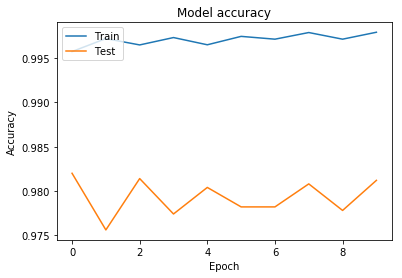

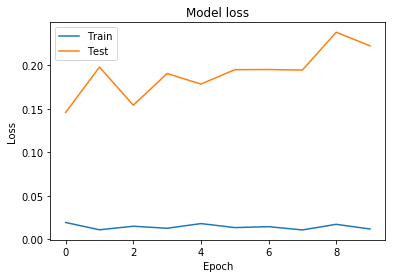

In [45]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()